<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 10px; background-color: #e8f5e9; text-align: center; font-size: 18px;">
    🎯 <b>Don't Forget to Upvote!</b> 🚀 <br>
    ❤️ Your support keeps me motivated! 🎉
</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

## Data adjustment

In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/digit-recognizer/train.csv'

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train["label"]
x_train = train.drop("label" , axis = 1)

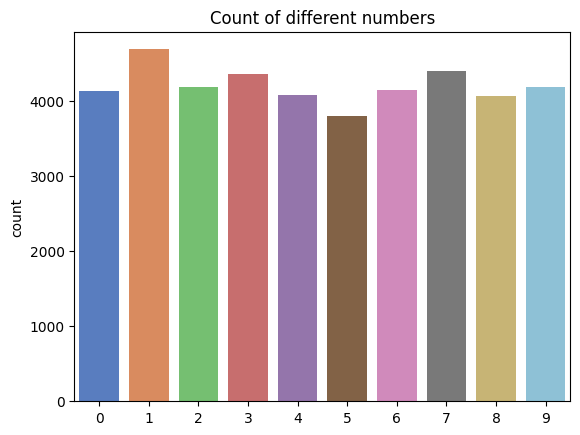

In [ ]:
#Count of different numbers
sns.countplot(x = y_train.values , palette = "muted")
plt.title("Count of different numbers")
plt.show()

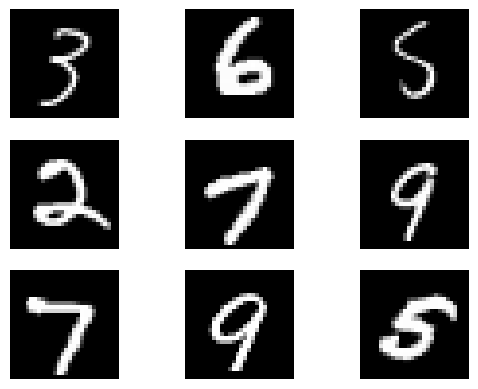

In [ ]:
#some images
j=1
for i in range(0,9):
    plt.subplot(3,3,j)
    number = random.randint(0,x_train.shape[0])
    array = x_train.iloc[number].values.reshape(28,28)
    plt.imshow(array, cmap = "gray" )
    plt.xlabel(y_train[number])
    plt.axis("off")
    j+=1

In [ ]:
#label encoding for softmax activation
from keras.utils import to_categorical
y_train = to_categorical(y_train , num_classes = 10)

In [ ]:
#normalization
x_train = x_train/255
test = test/255

Convolutional Neural Networks (CNNs) expect a 4D tensor as input because they process images with multiple dimensions:

- Number of samples (batch size): The total number of images.
- Height: The height (vertical size) of each image.
- Width: The width (horizontal size) of each image.
- Channels: The number of color channels (e.g., 1 for grayscale, 3 for RGB).

In [ ]:
#reshaping
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: " , x_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


## Prediction

In [ ]:
#split train data
from sklearn.model_selection import train_test_split
x_train , x_val , y_train , y_val = train_test_split(x_train , y_train , test_size = 0.1 , random_state = 2)

In [ ]:
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Dropout , Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(activation = "relu",input_shape = (28,28,1),kernel_size = (5,5) , filters = 8 , padding = "same"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(padding = "same",activation = "relu",filters = 32 , kernel_size = (5,5)))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Conv2D(activation = "relu",padding = "same"  , filters = 64, kernel_size = (4,4)))
model.add(MaxPool2D(pool_size= (2,2),strides = (2,2)))
model.add(Conv2D(activation = "relu",padding = "same"  , filters = 256, kernel_size = (3,3)))
#model.add(MaxPool2D(pool_size= (3,3)))
model.add(Flatten())
model.add(Dense(activation = "relu" , units = 128))
model.add(Dropout(0.5))
model.add(Dense(activation = "softmax" , units = 10))

In [ ]:
adamoptimizer = Adam(learning_rate = 0.001,beta_1 = 0.9 , beta_2 = 0.999)
model.compile(optimizer = adamoptimizer , loss = "categorical_crossentropy" , metrics = ["accuracy"])

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.3,
    zoom_range = 0.2
    )

In [ ]:
x_val.shape

(4200, 28, 28, 1)

In [ ]:
history = model.fit(datagen.flow(x_train , y_train , batch_size = 250) ,
                    epochs = 20 , 
                    validation_data = (x_val , y_val),
                    steps_per_epoch = x_train.shape[0] // 250
                )

Epoch 1/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.3594 - loss: 1.7897 - val_accuracy: 0.9417 - val_loss: 0.1981
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7960 - loss: 0.6089 - val_accuracy: 0.9426 - val_loss: 0.2025
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.8412 - loss: 0.5237 - val_accuracy: 0.9560 - val_loss: 0.1444
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9000 - loss: 0.3933 - val_accuracy: 0.9548 - val_loss: 0.1477
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.8964 - loss: 0.3493 - val_accuracy: 0.9721 - val_loss: 0.0945
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9200 - loss: 0.2748 - val_accuracy: 0.9710 - val_loss: 0.1036
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9228 - loss: 0.2706 - val_accuracy: 0.9724 - val_loss: 0.0930
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9240 - loss: 0.1955 - val_acc

In [ ]:
history.history["accuracy"]

[0.5635685920715332,
 0.7960000038146973,
 0.8596005439758301,
 0.8999999761581421,
 0.9068175554275513,
 0.9200000166893005,
 0.9266045093536377,
 0.9240000247955322,
 0.9396005272865295,
 0.9520000219345093,
 0.9460719227790833,
 0.9359999895095825,
 0.9556325078010559,
 0.9639999866485596,
 0.9594407677650452,
 0.9240000247955322,
 0.9625299572944641,
 0.9760000109672546,
 0.966444730758667,
 0.9639999866485596]

In [ ]:
#prediction with validation data
predictions = model.predict(x_val)


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
#converting
predictions = [i.argmax() for i in predictions]
y_val_not_categorical = [i.argmax() for i in y_val]

In [ ]:
wrongpredictionindexes = []
truepredictionindexes = []
for i in range(0,len(y_val_not_categorical)):
    if(predictions[i] == y_val_not_categorical[i]):
        truepredictionindexes.append(i)
    else:
        wrongpredictionindexes.append(i)
        

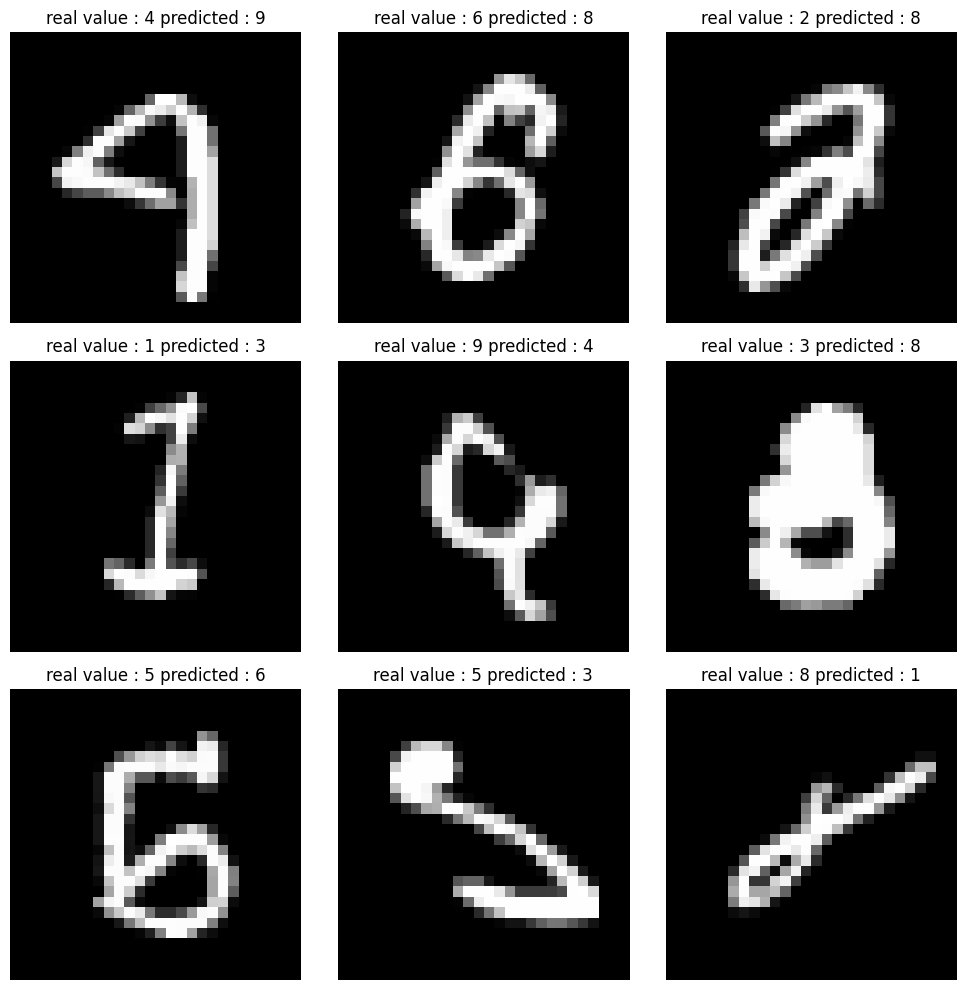

In [ ]:
#some wrong predicted images
j=1
plt.figure(figsize=(10,10))
for i in wrongpredictionindexes[10:19]:
    plt.subplot(3,3,j)
    plt.imshow(x_val[i],cmap = "gray")
    plt.title(f"real value : {y_val_not_categorical[i]} predicted : {predictions[i]}")
    plt.axis("off")
    j+=1
plt.tight_layout()
plt.show()

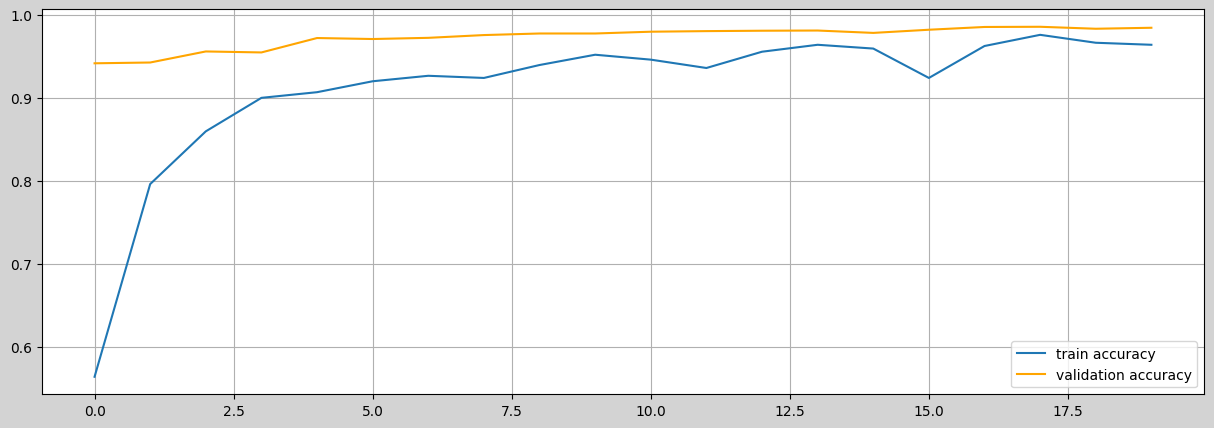

In [ ]:
#Train and validation accuracy change graph
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.figure(figsize=(15, 5), facecolor='lightgray')
sns.lineplot(train_acc , label = "train accuracy")
sns.lineplot(val_acc , color = "orange" , label = "validation accuracy")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#prediction with test data
test_predictions = [i.argmax() for i in model.predict(test)]

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
sample_submission = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
sample_submission["Label"] = test_predictions
sample_submission.to_csv("submission.csv" , index = False)

<div style="border: 3px solid #4CAF50; padding: 15px; border-radius: 10px; background-color: #E8F5E9; text-align: center; font-size: 18px;">
    🎉 <b>That’s a wrap! 🚀</b> <br>  
    🔍 Keep exploring, keep learning, and keep innovating! 💡 <br>  
    📢 Have thoughts or feedback? Drop a comment below! 💬 <br>  
    🌟 Wishing you success on your Kaggle journey! ✨  
</div>
